In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# Data Overview

In [2]:
df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
df.shape

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Data Wrangling

In [8]:
# Make a copy
df_airbnb = df.copy()

In [9]:
# Because of these columns with null values are not useful, so fill in with 0
df_airbnb['name'].fillna(0, inplace=True)
df_airbnb['host_name'].fillna(0, inplace=True)
df_airbnb['reviews_per_month'].fillna(0, inplace=True)

# Drop 
df_airbnb.drop('reviews_per_month', axis=1, inplace=True)

In [10]:
# Check how many time 0 appears in the price column
df_airbnb.groupby(['price']).size()[0]

11

In [11]:
# View outliers in min_night
nights = df_airbnb[['minimum_nights']]

# Sort the values
nights.sort_values(by='minimum_nights', ascending=False).head(50)

,minimum_nights
5767,1250
2854,1000
38664,999
13404,999
26341,999
47620,500
14285,500
8014,500
11193,500
7355,500


In [12]:
df_airbnb.loc[df_airbnb['minimum_nights'] > 365, 'minimum_nights'] = 365

In [13]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,6.942980,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,17.530294,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,327.000000,365.000000


# Visualization

## number of reviews vs. neighborhood

In [14]:
df_airbnb1 = df_airbnb[['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'availability_365']]

In [15]:
# Check the number of reviews based on neighbourhood
numb_reviews = df_airbnb1['number_of_reviews'].groupby(df_airbnb['neighbourhood_group'])
numb_reviews.sum()

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

In [16]:
reviews = pd.DataFrame(numb_reviews.sum())
reviews.sort_values(by='number_of_reviews', ascending=False, inplace=True)

In [17]:
reviews

,number_of_reviews
neighbourhood_group,
Brooklyn,486574
Manhattan,454569
Queens,156950
Bronx,28371
Staten Island,11541


[Text(0.5, 1.0, 'Sum of reviews of each neighbor'),
 Text(0.5, 0, 'reviews'),
 Text(0, 0.5, 'location')]

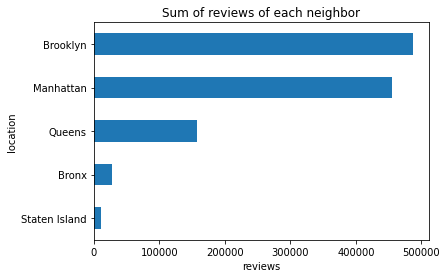

In [18]:
# Set up the figure plot
fig = plt.figure()

reviews_barh = reviews['number_of_reviews'].sort_values().plot.barh(fontsize=10)
reviews_barh

# Title and labels
props = {
    'title':'Sum of reviews of each neighbor',
    'xlabel':'reviews',
    'ylabel': 'location',
    }
reviews_barh.set(**props)

In [19]:
# Check out the price for each neighbor
neighbor_prices = df_airbnb1['price'].groupby(df_airbnb['neighbourhood_group'])
neighbor_prices.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


### Conclusion
Brooklyn has the most reviews, followed by Manhattan. Manhattan has the highest average price, followed by Brooklyn and Bronx

## Room type vs. Avg price

In [20]:
# Count total number of each room type
df_airbnb1['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [21]:
# The Avg price for each roome type
group_prices = df_airbnb1['price'].groupby(df_airbnb['room_type'])
group_prices.mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

In [22]:
# Check out number of reviews of each room type
popular_room = df_airbnb1['number_of_reviews'].groupby(df_airbnb['room_type'])
popular_room.sum()

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [23]:
room_type_reviews = df_airbnb1.pivot_table('number_of_reviews', index='neighbourhood_group', columns='room_type', aggfunc='sum')
room_type_reviews

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


Text(0, 0.5, 'Sum_of_reviews')

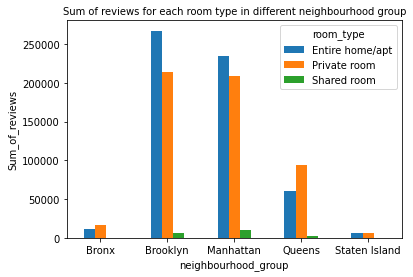

In [24]:
room_type_reviews.plot.bar(fontsize=10, rot=0)

plt.title('Sum of reviews for each room type in different neighbourhood group', fontsize=10)
plt.ylabel('Sum_of_reviews')

In [25]:
# Check the Avg price for each room type in different neighborhood
neigh_avg_price = df_airbnb1.groupby([df_airbnb1['neighbourhood_group'],df_airbnb1['room_type']])['price'].mean().unstack()
neigh_avg_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Avg_price')

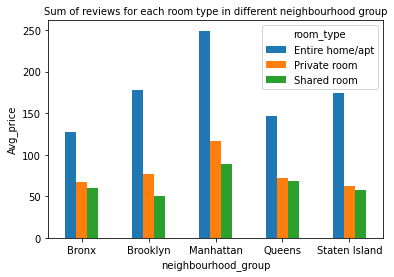

In [26]:
neigh_avg_price.plot.bar(fontsize=10, rot=0)

plt.title('Sum of reviews for each room type in different neighbourhood group', fontsize=10)
plt.ylabel('Avg_price')

### Conclusion
1. Entire home/apt is the most popular room type in Brooklyn and Manhattan. The average price is the highest;
2. At Bronx and Queens, Private room is relatively popular which the price is in the middle;
3. Manhattan has the highest prices, and entire room/apt helps to increase Manhattan price
4. Entire home/apt has the highest prices no matter where people live in

## Feature of popular housing

In [27]:
popular_housing = df_airbnb.sort_values(by='number_of_reviews', ascending = False).head(10)
popular_housing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,1,0


In [28]:
popular_housing_type = pd.crosstab(popular_housing['neighbourhood_group'], popular_housing['room_type'])
popular_housing_type

room_type,Entire home/apt,Private room
neighbourhood_group,,
Brooklyn,1,1
Manhattan,0,4
Queens,0,4


In [29]:
popular_housing['price'].mean()

65.4

### Conclusion
1. Manhattan and Queens have both 4 popular housing that room type is procate room
2. The average popular housing price is $65.4 which satisfy the needs of tourists